In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import random
import os
import numpy as np
import pandas as pd
import cv2
import os
from PIL import Image
import tensorflow as tf
import keras.backend as K
from keras.applications import Xception
from keras.layers import UpSampling2D, Conv2D, Activation, LeakyReLU, BatchNormalization,Input,Conv2DTranspose
from keras import Model
from keras.losses import binary_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, LearningRateScheduler,Callback
from tqdm import tqdm_notebook

In [43]:
data = pd.read_csv("F:\\Programs_GB\\Introduction-to-neural-networks\\dz5\\train.csv")

In [44]:
data

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...
...,...,...,...
7090,ffcf72ecf.jpg,3,121911 34 122167 101 122422 169 122678 203 122...
7091,fff02e9c5.jpg,3,207523 3 207777 9 208030 15 208283 22 208537 2...
7092,fffe98443.jpg,3,105929 5 106177 14 106424 24 106672 33 106923 ...
7093,ffff4eaa8.jpg,3,16899 7 17155 20 17411 34 17667 47 17923 60 18...


In [45]:
data.shape

(7095, 3)

In [46]:
image1 = Image.open("F:\\Programs_GB\\Introduction-to-neural-networks\\dz5\\train_images\\train_images\\0a1cade03.jpg")
image2 = Image.open("F:\\Programs_GB\\Introduction-to-neural-networks\\dz5\\train_images\\train_images\\0a5ad2f0f.jpg")
image3 = Image.open("F:\\Programs_GB\\Introduction-to-neural-networks\\dz5\\train_images\\train_images\\0aa66dd72.jpg")

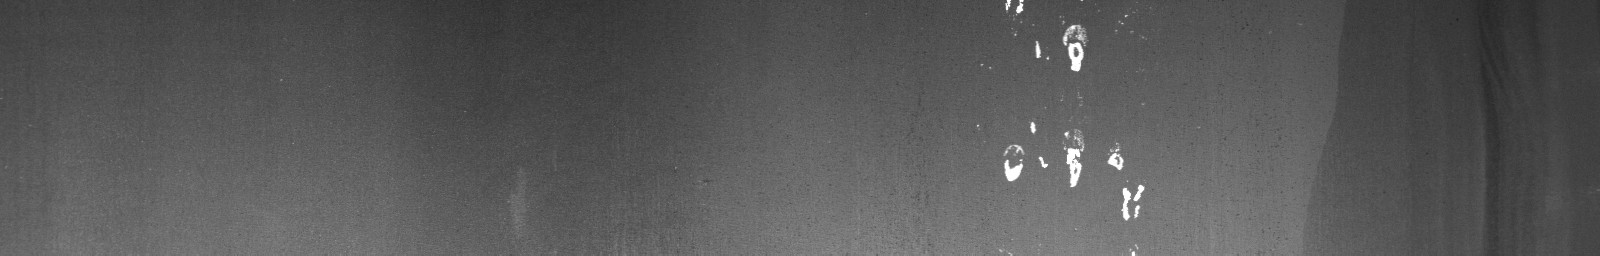

In [47]:
image1

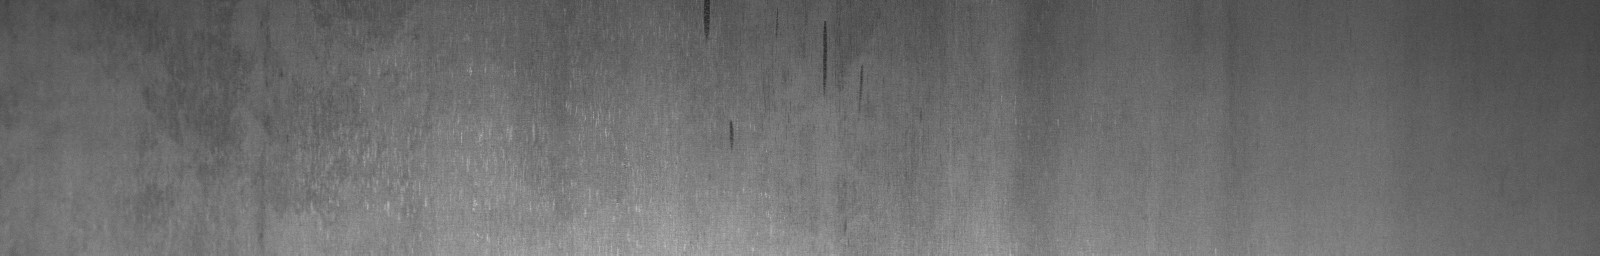

In [48]:
image2

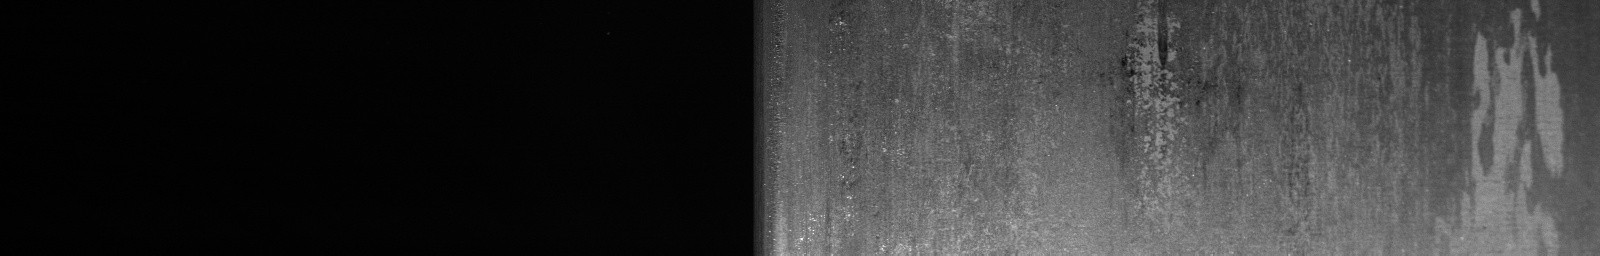

In [49]:
image3

In [50]:
image1.size, image2.size, image3.size  # размер изображения

((1600, 256), (1600, 256), (1600, 256))

In [51]:
data = ImageDataGenerator(rescale = 1/255.0, validation_split = 0.2,
                          rotation_range=90, width_shift_range=0.,
                          height_shift_range=0., brightness_range=None,
                          shear_range=0., zoom_range=0.,
                          channel_shift_range=0., fill_mode='nearest',
                          cval=0., horizontal_flip=True, vertical_flip=True)

In [52]:
df_train = pd.read_csv("F:\\Programs_GB\\Introduction-to-neural-networks\\dz5\\train.csv")

In [53]:
df_train['ClassId'] = df_train['ClassId'].astype(str)

In [54]:
trainData = data.flow_from_dataframe(dataframe=df_train,
                                                directory='F:\\Programs_GB\\Introduction-to-neural-networks\\dz5\\train_images\\train_images\\',
                                                target_size=(120, 120), x_col="ImageId",
                                                y_col="ClassId", batch_size=16,
                                                class_mode= "categorical", subset = "training")

Found 910 validated image filenames belonging to 4 classes.


c:\Users\Ivan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\preprocessing\image.py:1137: UserWarning: Found 5958 invalid image filename(s) in x_col="ImageId". These filename(s) will be ignored.
  warnings.warn(


In [55]:
testData = data.flow_from_dataframe(dataframe=df_train,
                                                directory='F:\\Programs_GB\\Introduction-to-neural-networks\\dz5\\train_images\\train_images\\',
                                                target_size=(120, 120), x_col='ImageId',
                                                y_col="ClassId", batch_size=16,
                                                class_mode='categorical', subset = "validation")

Found 227 validated image filenames belonging to 4 classes.


c:\Users\Ivan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\preprocessing\image.py:1137: UserWarning: Found 5958 invalid image filename(s) in x_col="ImageId". These filename(s) will be ignored.
  warnings.warn(


In [56]:
import keras 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, MaxPooling2D, Dropout

In [57]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3,3),padding='valid',activation='relu',input_shape=(120,120,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(16, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4, activation = 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 118, 118, 128)     3584      
                                                                 
 batch_normalization_8 (Bat  (None, 118, 118, 128)     512       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 59, 59, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 57, 57, 64)        73792     
                                                                 
 batch_normalization_9 (Bat  (None, 57, 57, 64)        256       
 chNormalization)                                                
                                                      

In [58]:
import visualkeras

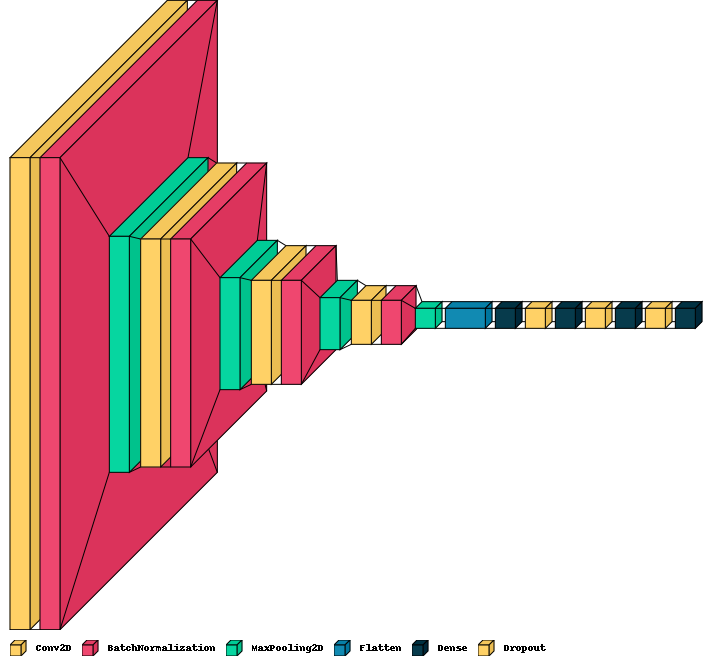

In [59]:
visualkeras.layered_view(model, legend=True) 

In [60]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=["accuracy"])

In [61]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [62]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

In [64]:
history = model.fit(trainData, steps_per_epoch= len(trainData), 
                    epochs = 10, verbose= 1, validation_data = testData, 
                    validation_steps = len(testData))

Epoch 1/10
57/57 [==============================] - 20s 355ms/step - loss: 0.9971 - accuracy: 0.6945 - val_loss: 1.0068 - val_accuracy: 0.7048
Epoch 2/10
57/57 [==============================] - 20s 354ms/step - loss: 0.9493 - accuracy: 0.7165 - val_loss: 0.9386 - val_accuracy: 0.7048
Epoch 3/10
57/57 [==============================] - 21s 359ms/step - loss: 0.9262 - accuracy: 0.7374 - val_loss: 0.9510 - val_accuracy: 0.7048
Epoch 4/10
57/57 [==============================] - 20s 349ms/step - loss: 0.9050 - accuracy: 0.7319 - val_loss: 0.9375 - val_accuracy: 0.7048
Epoch 5/10
57/57 [==============================] - 20s 348ms/step - loss: 0.8745 - accuracy: 0.7418 - val_loss: 0.9472 - val_accuracy: 0.7048
Epoch 6/10
57/57 [==============================] - 20s 348ms/step - loss: 0.8787 - accuracy: 0.7516 - val_loss: 0.9389 - val_accuracy: 0.7048
Epoch 7/10
57/57 [==============================] - 20s 350ms/step - loss: 0.8434 - accuracy: 0.7538 - val_loss: 0.9345 - val_accuracy: 0.7048